In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
# 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet
#from sklearn.tree import export_graphviz  환경 설정하기 어려움
#import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# 나무 구조 시각화  
from sklearn.tree import plot_tree
# 예측 / 회귀 random forest
from sklearn.ensemble import RandomForestRegressor
matplotlib.rc('font', family = 'Malgun Gothic') 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale, minmax_scale, robust_scale

#평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rc('font', family = 'Malgun Gothic') 

from scipy.stats import chi2_contingency
from scipy import stats

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("C:/Users/USER/Desktop/반도체 공정/데이터/데이터셋 초초안.CSV",encoding='euc-kr')
df

,Unnamed: 0,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Chamber,Etching_rate
0,0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,21111,169.78300
1,1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,21122,171.94875
2,2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,21133,167.25350
3,3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,21111,169.45425
4,4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,21122,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,33333,174.44950
1700,1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,11133,172.29475
1701,1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,11222,174.68650
1702,1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,11311,174.82175


In [6]:
df['Etching_rate']

0       169.78300
1       171.94875
2       167.25350
3       169.45425
4       172.43300
          ...    
1699    174.44950
1700    172.29475
1701    174.68650
1702    174.82175
1703    174.23450
Name: Etching_rate, Length: 1704, dtype: float64

In [5]:
df.drop(['Unnamed: 0','Chamber'] ,axis = 1, inplace = True)

In [6]:
df

,type,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,...,Flux90s,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,Etching_rate
0,dry,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,...,1.320000e+17,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,0,169.78300
1,dry,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,...,4.370000e+16,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,0,171.94875
2,dry,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,...,1.510000e+16,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,0,167.25350
3,dry,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,...,1.020000e+17,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,0,169.45425
4,wet,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,...,7.880000e+16,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,0,172.43300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,wet,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,19.998,...,9.510000e+16,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,0,174.44950
1700,wet,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,20.000,...,5.430000e+16,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,0,172.29475
1701,wet,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,19.994,...,9.240000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,0,174.68650
1702,wet,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,20.002,...,2.790000e+16,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,0,174.82175


In [7]:
df_y = df['Target']
df_x = df.drop('Target', axis = 1, inplace = False)

In [8]:
df_x_dummy = pd.get_dummies(df_x)

In [9]:
df_x_dummy

,Temp_OXid,ppm,Pressure,Oxid_time,thickness,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,...,Flux160s,Flux480s,Flux840s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Etching_rate,type_dry,type_wet
0,1214.307948,26.69,0.203,120,713.132,1.46994,17.367,15.006,20.001,200.551,...,1.380000e+17,3.010000e+17,6.000000e+17,30795.934,103.433,854.0,154,169.78300,1,0
1,978.110792,30.86,0.217,137,714.295,0.86579,16.090,15.059,19.993,199.835,...,1.380000e+17,3.030000e+17,6.000000e+17,32135.618,105.552,895.0,156,171.94875,1,0
2,1176.019149,31.07,0.218,116,710.114,0.90483,19.026,14.930,19.995,202.118,...,1.380000e+17,2.980000e+17,6.000000e+17,31057.895,102.598,898.0,152,167.25350,1,0
3,933.442733,31.04,0.196,143,710.617,0.42197,18.891,14.947,20.004,194.668,...,1.380000e+17,3.000000e+17,6.000000e+17,32140.566,102.963,879.0,155,169.45425,1,0
4,1140.598752,31.37,0.215,76,711.632,1.70139,13.788,14.820,19.998,202.192,...,1.380000e+17,3.020000e+17,6.000000e+17,31986.009,101.419,882.0,155,172.43300,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1275.182502,45.10,0.214,21,715.498,0.89644,16.029,15.005,19.998,204.429,...,1.380000e+17,3.010000e+17,6.000000e+17,32248.621,101.503,868.0,152,174.44950,0,1
1700,1268.105427,45.07,0.215,22,707.179,1.02384,17.587,14.949,20.000,204.266,...,1.870000e+17,3.010000e+17,6.000000e+17,32241.426,101.061,867.0,152,172.29475,0,1
1701,1279.160563,45.12,0.214,21,712.946,1.02634,16.445,14.978,19.994,203.401,...,1.380000e+17,2.990000e+17,6.000000e+17,32245.574,101.506,868.0,152,174.68650,0,1
1702,1272.804948,45.34,0.213,20,711.987,0.56833,15.306,15.050,20.002,203.670,...,1.380000e+17,2.990000e+17,6.000000e+17,32259.412,101.360,868.0,152,174.82175,0,1


# DT

In [10]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy, df_y,
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 36)
train data Y size : (1022,)
test data X size : (682, 36)
test data Y size : (682,)


In [11]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.935


In [12]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.934,0.927
1,2,0.947,0.940
2,3,0.953,0.937
3,4,0.959,0.941
4,5,0.966,0.944
5,6,0.973,0.931
6,7,0.981,0.927
7,8,0.990,0.934
8,9,0.992,0.943
9,10,0.997,0.935


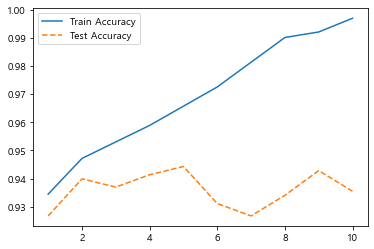

In [13]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [14]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 5
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,2,0.966,0.944
1,4,0.965,0.944
2,6,0.963,0.946
3,8,0.961,0.941
4,10,0.958,0.940
5,12,0.958,0.940
6,14,0.958,0.940
7,16,0.958,0.940
8,18,0.952,0.938
9,20,0.950,0.937


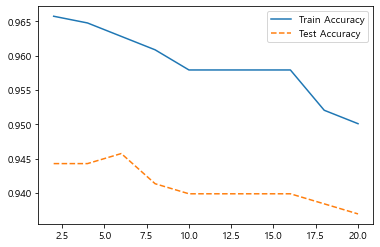

In [15]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

In [18]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth = 5, min_samples_split=6
                                , min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,2,0.962,0.943
1,4,0.956,0.933
2,6,0.955,0.927
3,8,0.950,0.933
4,10,0.956,0.927
5,12,0.953,0.928
6,14,0.949,0.925
7,16,0.948,0.924
8,18,0.946,0.938
9,20,0.945,0.935


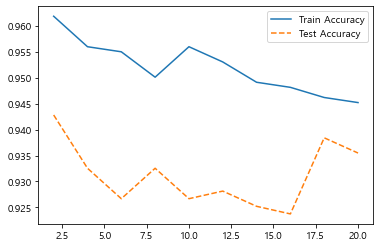

In [19]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

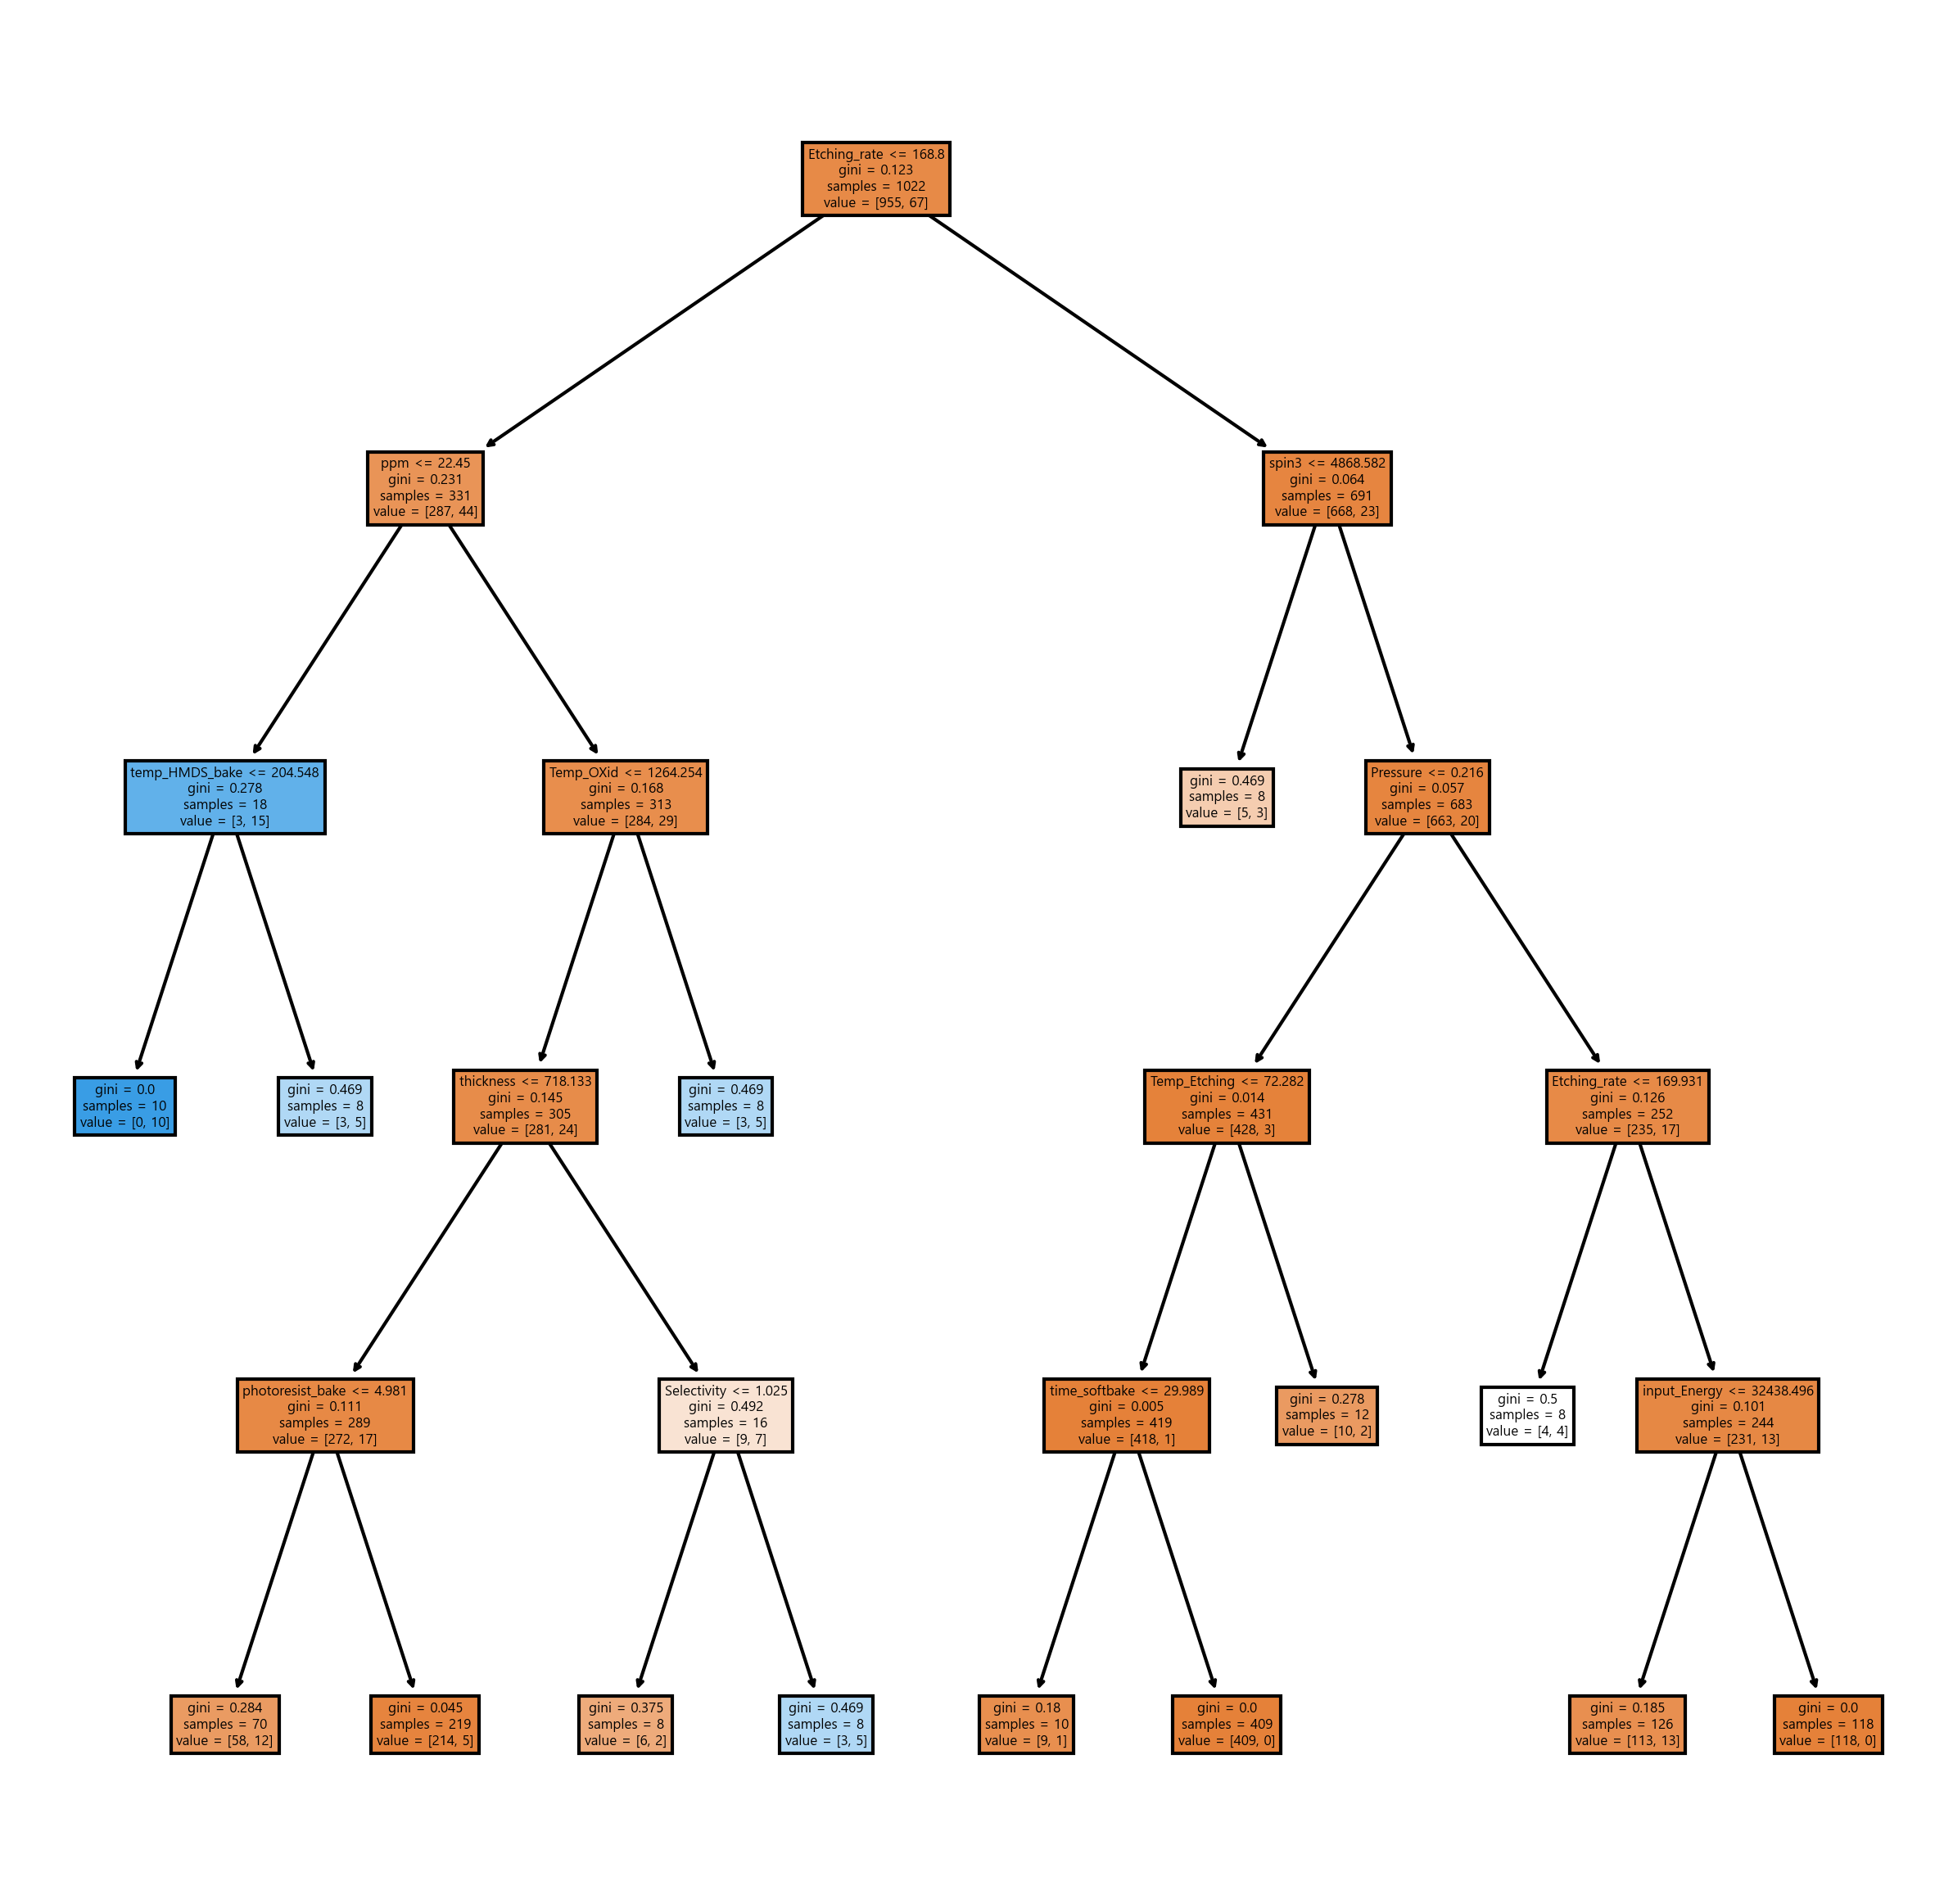

In [24]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 6, max_depth = 5, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10, 10), dpi=300)
plot_tree(tree_final, feature_names = v_feature_name, filled = True);

In [102]:
y_pred = tree_final.predict(df_test_x)

print('Accuracy on training set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Accuracy on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))


Accuracy on training set : 0.950
Accuracy on test set : 0.933
Confusion matrix : 
[[622  10]
 [ 36  14]]
              precision    recall  f1-score   support

           0      0.945     0.984     0.964       632
           1      0.583     0.280     0.378        50

    accuracy                          0.933       682
   macro avg      0.764     0.632     0.671       682
weighted avg      0.919     0.933     0.921       682



In [26]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,ppm,0.414
33,Etching_rate,0.167
0,Temp_OXid,0.103
4,thickness,0.096
14,photoresist_bake,0.052
13,spin3,0.042
29,input_Energy,0.029
9,temp_HMDS_bake,0.028
2,Pressure,0.026
23,Selectivity,0.025


Text(0, 0.5, '설명변수')

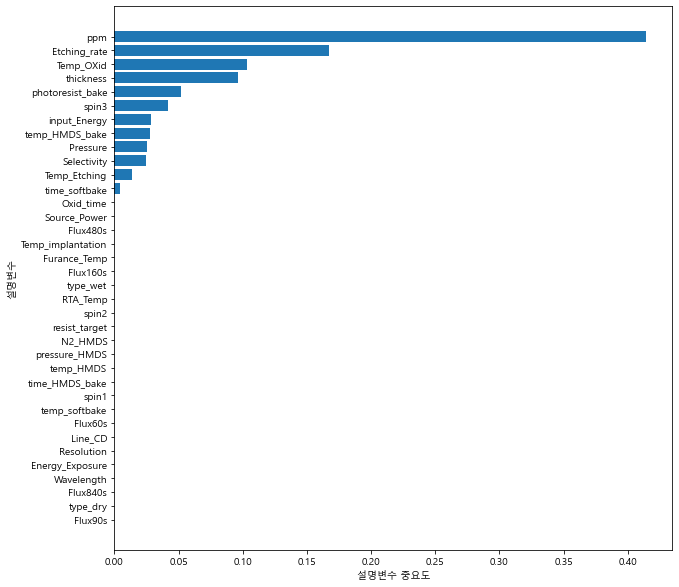

In [27]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# RF

In [87]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x_dummy ,# 설명변수
                                                                df_y, # 목표변수
                                                               test_size= 0.4, random_state=1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (1022, 36)
train data Y size : (1022,)
test data X size : (682, 36)
test data Y size : (682,)


In [88]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.962


In [89]:
train_accuracy =[]
test_accuracy=[]

para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.994,0.956
1,20,0.999,0.959
2,30,1.000,0.962
3,40,1.000,0.957
4,50,1.000,0.960
5,60,1.000,0.960
6,70,1.000,0.963
7,80,1.000,0.965
8,90,1.000,0.962
9,100,1.000,0.962


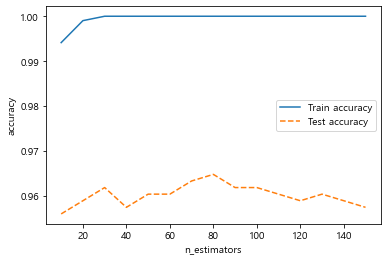

In [90]:
plt.plot(para_n_tree, train_accuracy, linestyle = '-', label = 'Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle = '--', label = 'Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()

In [91]:
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(random_state = 1234,n_estimators =v_n_estimators ,oob_score=True)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1- rf.oob_score_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
C:\Users\USER\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used 

KeyboardInterrupt: 

In [ ]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [92]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state=1234, max_depth = v_max_depth, n_estimators = 90)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.934,0.927
1,2,0.934,0.927
2,3,0.935,0.930
3,4,0.942,0.933
4,5,0.954,0.934
5,6,0.960,0.935
6,7,0.975,0.943
7,8,0.989,0.947
8,9,0.992,0.949
9,10,0.997,0.955


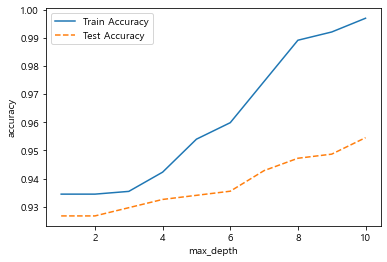

In [93]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [95]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(random_state=1234, max_depth = 4, n_estimators = 90
                                 , min_samples_split=v_min_samples_split )
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,0.937,0.931
1,20,0.936,0.930
2,30,0.934,0.928
3,40,0.934,0.928
4,50,0.934,0.927
5,60,0.934,0.927
6,70,0.934,0.927
7,80,0.934,0.927
8,90,0.934,0.927
9,100,0.934,0.927


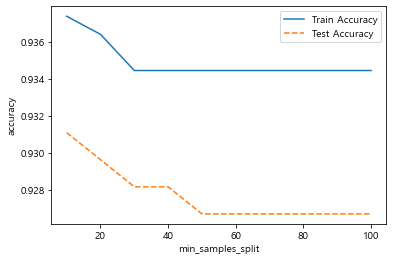

In [96]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_split')
plt.legend()

In [97]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(random_state = 1234, max_depth = 4, min_samples_split=20,n_estimators = 90
                                , min_samples_leaf = v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,1,0.936,0.930
1,2,0.935,0.930
2,3,0.935,0.930
3,4,0.935,0.930
4,5,0.935,0.930
5,6,0.935,0.930
6,7,0.935,0.930
7,8,0.935,0.930
8,9,0.934,0.927
9,10,0.934,0.927


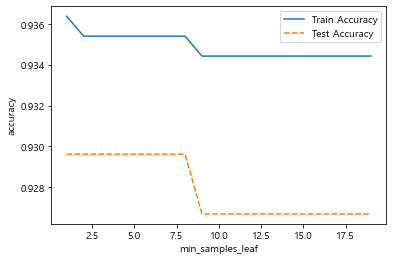

In [98]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [99]:
rf_final = RandomForestClassifier(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234,
                                n_estimators =90)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 0.935
Accuracy on test set : 0.930
Confusion matrix : 
[[632   0]
 [ 48   2]]
              precision    recall  f1-score   support

           0      0.929     1.000     0.963       632
           1      1.000     0.040     0.077        50

    accuracy                          0.930       682
   macro avg      0.965     0.520     0.520       682
weighted avg      0.935     0.930     0.898       682



In [100]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
33,Etching_rate,0.135
14,photoresist_bake,0.090
0,Temp_OXid,0.069
15,temp_softbake,0.053
13,spin3,0.049
29,input_Energy,0.047
26,Flux160s,0.047
4,thickness,0.043
2,Pressure,0.039
11,spin1,0.039


Text(0, 0.5, '설명변수')

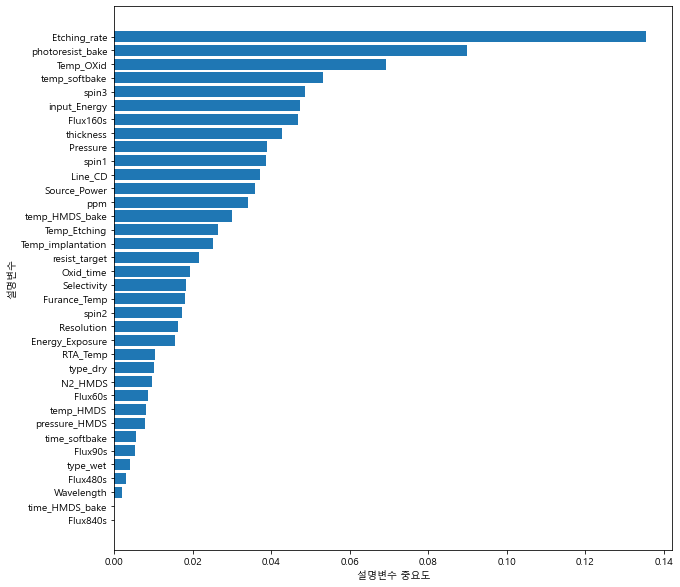

In [101]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# GB

In [59]:
gb_uncustomized = GradientBoostingClassifier(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_uncustomized.score(df_test_x, df_test_y)))



Accuracy on training set : 0.999
Accuracy on test set : 0.959


In [60]:
train_accuracy = [] 
test_accuracy = []
# 학습률 변경에 따른 모델 성능
para_lr = [lr*0.1 for lr in range(1, 11)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state=1234, learning_rate = v_learning_rate )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_lr = pd.DataFrame()
df_accuracy_lr["LearningRate"] = para_lr
df_accuracy_lr["Trainaccuracy"] = train_accuracy
df_accuracy_lr["Testaccuracy"] = test_accuracy
df_accuracy_lr.round(3)

,LearningRate,Trainaccuracy,Testaccuracy
0,0.1,0.999,0.959
1,0.2,1.000,0.966
2,0.3,1.000,0.969
3,0.4,1.000,0.963
4,0.5,1.000,0.955
5,0.6,1.000,0.959
6,0.7,1.000,0.968
7,0.8,1.000,0.956
8,0.9,1.000,0.963
9,1.0,0.998,0.953


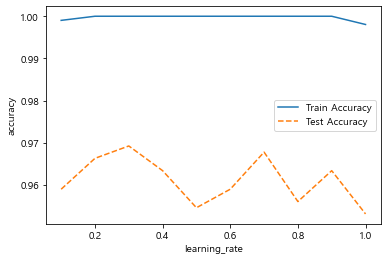

In [61]:
plt.plot(para_lr, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_lr, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('learning_rate')
plt.legend()

In [62]:
train_accuracy =[]
test_accuracy=[]
# 트리 수에 변경에 따른 모델 성능
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(random_state = 1234,n_estimators =v_n_estimators, learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['Estimators'] = para_n_tree
df_accuracy_n['TrainScore'] = train_accuracy
df_accuracy_n['TestScore'] = test_accuracy
df_accuracy_n.round(3)

,Estimators,TrainScore,TestScore
0,10,0.981,0.934
1,20,0.998,0.946
2,30,0.999,0.950
3,40,1.000,0.957
4,50,1.000,0.962
5,60,1.000,0.966
6,70,1.000,0.968
7,80,1.000,0.969
8,90,1.000,0.969
9,100,1.000,0.969


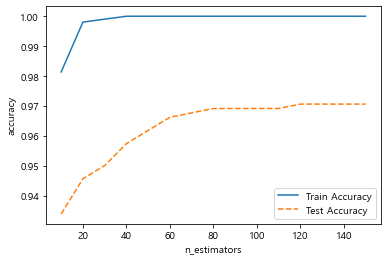

In [63]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()


In [64]:
train_accuracy= []
test_accuracy = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = v_max_depth,n_estimators = 120,learning_rate = 0.3)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.967,0.952
1,2,1.000,0.966
2,3,1.000,0.971
3,4,1.000,0.968
4,5,1.000,0.966
5,6,1.000,0.971
6,7,1.000,0.968
7,8,1.000,0.934
8,9,1.000,0.938
9,10,1.000,0.938


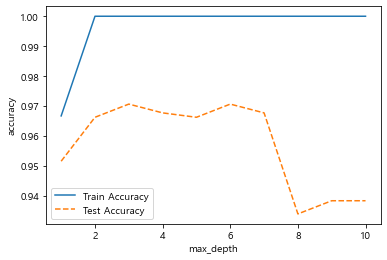

In [65]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.legend()

In [66]:
train_accuracy = [] 
test_accuracy = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(random_state=1234, max_depth = 3, n_estimators = 120,learning_rate = 0.3
                                 , min_samples_split=v_min_samples_split )
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
# 결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["Trainaccuracy"] = train_accuracy
df_accuracy_split["Testaccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,Trainaccuracy,Testaccuracy
0,10,1.0,0.971
1,20,1.0,0.957
2,30,1.0,0.968
3,40,1.0,0.968
4,50,1.0,0.965
5,60,1.0,0.966
6,70,1.0,0.968
7,80,1.0,0.968
8,90,1.0,0.965
9,100,1.0,0.968


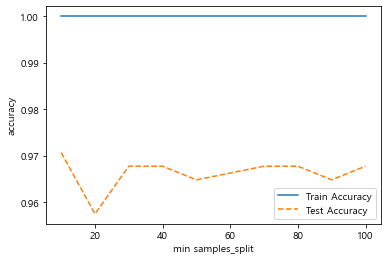

In [67]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min samples_split')
plt.legend()

In [103]:
train_accuracy =[]
test_accuracy=[]

para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]
# 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능
for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingClassifier(random_state = 1234, max_depth = 3, min_samples_split=30,n_estimators = 120
                                , learning_rate = 0.3,min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['Trainaccuracy'] = train_accuracy
df_accuracy_leaf['Testaccuracy'] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Trainaccuracy,Testaccuracy
0,10,1.0,0.969
1,20,1.0,0.969
2,30,1.0,0.969
3,40,1.0,0.968
4,50,1.0,0.968
5,60,1.0,0.971
6,70,1.0,0.969
7,80,1.0,0.968
8,90,1.0,0.963
9,100,1.0,0.966


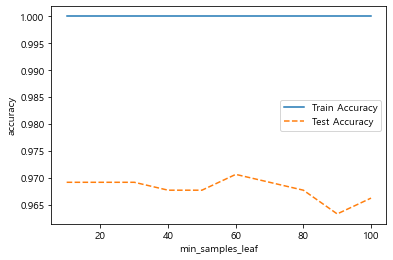

In [104]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leaf')
plt.legend()

In [105]:
gb_final = GradientBoostingClassifier(min_samples_leaf = 60, min_samples_split = 30, max_depth = 3, random_state=1234,
                               learning_rate = 0.3, n_estimators =120)
gb_final.fit(df_train_x, df_train_y)
y_pred = gb_final.predict(df_test_x)

# train 데이터 설명력
print('Accuracy on training set : {:.3f}'.format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print('Accuracy on test set : {:.3f}'.format(gb_final.score(df_test_x, df_test_y)))
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y,y_pred, digits = 3))

Accuracy on training set : 1.000
Accuracy on test set : 0.971
Confusion matrix : 
[[627   5]
 [ 15  35]]
              precision    recall  f1-score   support

           0      0.977     0.992     0.984       632
           1      0.875     0.700     0.778        50

    accuracy                          0.971       682
   macro avg      0.926     0.846     0.881       682
weighted avg      0.969     0.971     0.969       682



In [106]:
v_feature_name = df_train_x.columns
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
33,Etching_rate,0.222
0,Temp_OXid,0.171
4,thickness,0.096
29,input_Energy,0.091
14,photoresist_bake,0.077
2,Pressure,0.043
17,Line_CD,0.038
11,spin1,0.029
30,Temp_implantation,0.028
19,Resolution,0.021


Text(0, 0.5, '설명변수')

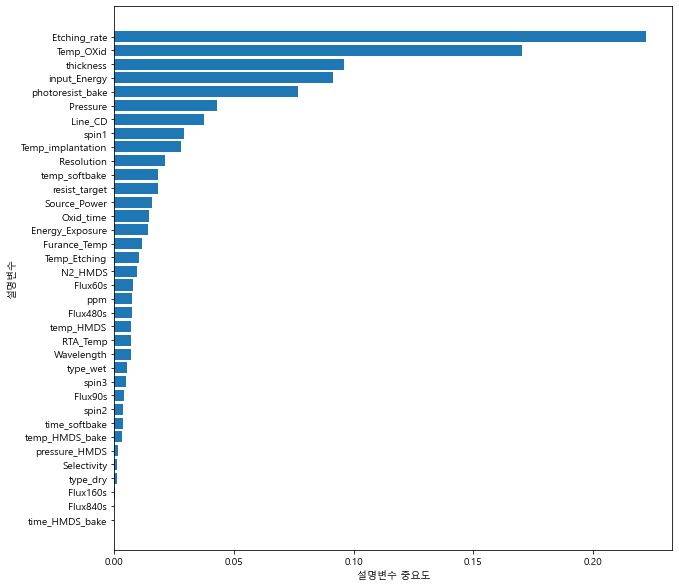

In [107]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize = (10,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")